In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [94]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [95]:
# Try SVM
clf = svm.SVC()
clf.fit(X,y)
cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

0.44878680061604637

In [96]:
# Try Logistic Regression
logistic = LogisticRegression()
cross_val_score(logistic, X, y, cv=5, scoring='accuracy').mean()

0.92101881133607011

In [97]:
# Try Random Forest
rfclf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
cross_val_score(rfclf, X, y, cv=5, scoring='accuracy').mean()

0.93828132711600687

In [98]:
from pybrain.datasets            import ClassificationDataSet
from pybrain.utilities           import percentError
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer
from numpy import ravel

In [99]:
# pybrain has its own data sample class that we must add
# our training and test set to
ds = ClassificationDataSet(64, 1 , nb_classes=10)
for k in xrange(len(X)): 
    ds.addSample(ravel(X[k]),y[k])
    
# their equivalent of train test split
test_data, training_data = ds.splitWithProportion( 0.25 )

In [106]:
training_data['input']

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   6., ...,   6.,   0.,   0.],
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [101]:
test_data.data['target'][:5]

array([[ 4.],
       [ 8.],
       [ 9.],
       [ 3.],
       [ 6.]])

# From their own documentation
http://pybrain.org/docs/tutorial/fnn.html

For neural network classification, it is highly advisable to encode classes with one output neuron per class. Note that this operation duplicates the original targets and stores them in an (integer) field named ‘class’.

In [111]:
# pybrain's version of dummy variables

test_data._convertToOneOfMany( )
training_data._convertToOneOfMany( )

In [112]:
training_data['input']

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   6., ...,   6.,   0.,   0.],
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [113]:
test_data.data['target'][:5]

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int32)

same as 

4, 8, 9, 3, 6

In [114]:
print test_data.indim
print test_data.outdim

64
10


In [115]:
# instantiate the model with 64 hidden layers (standard params)
fnn = buildNetwork( training_data.indim, 64, training_data.outdim, outclass=SoftmaxLayer )
trainer = BackpropTrainer( fnn, dataset=training_data, momentum=0.1, learningrate=0.01 , verbose=True, weightdecay=0.01) 

In [116]:
# change the number of eopchs to try to get better results!
trainer.trainEpochs (10)
print 'Percent Error on Test dataset: ' , \
        percentError( trainer.testOnClassData (
           dataset=test_data )
           , test_data['class'] )

Total error: 0.0408701161005
Total error: 0.0195206506167
Total error: 0.0126048955788
Total error: 0.00886401332414
Total error: 0.00745460439044
Total error: 0.00601371497388
Total error: 0.00519898070989
Total error: 0.00468704329709
Total error: 0.00412539694238
Total error: 0.00360295379661
Percent Error on Test dataset:  3.78619153675


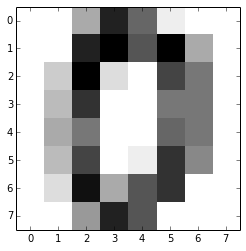

In [117]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [118]:
for i, prediction in enumerate(fnn.activate(X[0])):
    print i, prediction

0 0.954868931054
1 0.000138250661983
2 0.00322031872965
3 0.000674892884387
4 0.0130993999263
5 0.00688071645889
6 0.00210024182059
7 0.00230475670248
8 0.00464321483673
9 0.0120692769249


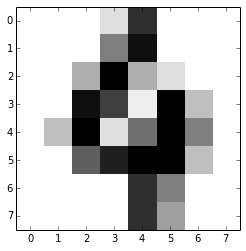

In [119]:
plt.imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest')

In [120]:
for i, prediction in enumerate(fnn.activate(X[100])):
    print i, prediction

0 0.00566122349295
1 0.0443209637745
2 0.000759043953691
3 7.71465455284e-05
4 0.924297927048
5 0.0023019013958
6 0.0151081222539
7 0.0040192423639
8 0.00255974982181
9 0.000894679350236


In [121]:
# do it again to see if we get different percent error
trainer.trainEpochs (10)
print 'Percent Error on Test dataset: ' , \
        percentError( trainer.testOnClassData (
           dataset=test_data )
           , test_data['class'] )

Total error: 0.00324812679568
Total error: 0.00304034890291
Total error: 0.00291157796978
Total error: 0.00272052605376
Total error: 0.00265734483288
Total error: 0.00273281478938
Total error: 0.00270548066286
Total error: 0.00266240625788
Total error: 0.00281261929997
Total error: 0.00260085524512
Percent Error on Test dataset:  2.89532293987


In [64]:
# FINAL TEST: What is this a sign of, folks?